In [1]:
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Evaluation of Best Classification Model Using GridSearchCV

In [5]:
#df = pd.read_csv("NoSqli_Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/Thesis Resources/dataset/NoSql_Injection/NoSqli_Dataset.csv")
df.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,ClassLabel
0,0,0,0,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [6]:

X = df.drop(['ClassLabel'],axis='columns')
Y = df['ClassLabel']

In [7]:
Y.value_counts()

0    801
1    203
Name: ClassLabel, dtype: int64

In [8]:
X.head(2)

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,0,0,0,1,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0,0


In [9]:
Y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: ClassLabel, dtype: int64

Helper functions

In [21]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
from imblearn.combine import SMOTEENN,SMOTETomek


def benchmark(sampling_type,X,Y):
    lr = LogisticRegression(penalty = 'l2')
    param_grid = {'C':[0.01,0.1,1,10]}
    gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)
    gs = gs.fit(X.values,Y.values.ravel())
    return sampling_type,gs.best_score_,gs.best_params_['C']

def transform(transformer,X,Y):
    print("Transforming {}".format(transformer.__class__.__name__))
    X_resampled,Y_resampled = transformer.fit_sample(X.values,Y.values.ravel())
    return transformer.__class__.__name__,pd.DataFrame(X_resampled), pd.DataFrame(Y_resampled)

Apply transformations to dataset

In [22]:
datasets = []
datasets.append(("base",X,Y))
datasets.append(transform(SMOTE(n_jobs=-1),X,Y))
datasets.append(transform(RandomOverSampler(),X,Y))
datasets.append(transform(NearMiss(n_jobs=-1),X,Y))
datasets.append(transform(RandomUnderSampler(),X,Y))
datasets.append(transform(SMOTEENN(),X,Y))
datasets.append(transform(SMOTETomek(),X,Y))

Transforming SMOTE
Transforming RandomOverSampler
Transforming NearMiss


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Transforming RandomUnderSampler
Transforming SMOTEENN
Transforming SMOTETomek


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Determine best hyperparameters

In [23]:
benchmark_scores = []
for sample_type,X,Y in datasets:
    print('______________________________________________________________')
    print('{}'.format(sample_type))
    benchmark_scores.append(benchmark(sample_type,X,Y))
    print('______________________________________________________________')

______________________________________________________________
base
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .............................................. C=1, total=   0.0s
[CV] C=1 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................................ C=0.1, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


______________________________________________________________
______________________________________________________________
NearMiss
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
______________________________________________________________
______________________________________________________________
SMOTETomek
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........................................................
[CV] ........................................... C=0.01, total=   0.0s
[CV] C=0.01 ..........

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
[CV] C=10 ............................................................
[CV] ............................................. C=10, total=   0.0s
______________________________________________________________


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


In [24]:
benchmark_scores

[('base', 0.9043980099502488, 1),
 ('SMOTE', 0.897038551401869, 1),
 ('RandomOverSampler', 0.8951693925233645, 1),
 ('NearMiss', 0.8646793134598013, 0.01),
 ('RandomUnderSampler', 0.8695874736525143, 1),
 ('SMOTEENN', 0.9950617283950617, 10),
 ('SMOTETomek', 0.8939135514018691, 1)]

Train/evaluate models for the tranformed dataset

In [25]:
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix, f1_score, precision_score, auc,roc_auc_score,roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 


scores = []
# train models based on benchmark params
for sampling_type,score,param in benchmark_scores:
    print("Training on {}".format(sampling_type))
    lr = LogisticRegression(penalty = 'l2',C=param)
    for s_type,X,Y in datasets:
        if s_type == sampling_type:
            lr.fit(X.values,Y.values.ravel())
            pred_test = lr.predict(X.values)
            pred_test_probs = lr.predict_proba(X.values)
            probs = lr.decision_function(X.values)
            fpr, tpr, thresholds = roc_curve(Y.values.ravel(),pred_test)
            p,r,t = precision_recall_curve(Y.values.ravel(),probs)
            scores.append((sampling_type,
                           f1_score(Y.values.ravel(),pred_test),
                           precision_score(Y.values.ravel(),pred_test),
                           recall_score(Y.values.ravel(),pred_test),
                           accuracy_score(Y.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           confusion_matrix(Y.values.ravel(),pred_test)))

sampling_results = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','confusion_matrix'])
sampling_results

Training on base
Training on SMOTE
Training on RandomOverSampler
Training on NearMiss
Training on RandomUnderSampler
Training on SMOTEENN
Training on SMOTETomek


,Sampling Type,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,base,0.779370,0.931507,0.669951,0.923307,0.828733,"[[791, 10], [67, 136]]"
1,SMOTE,0.898294,0.909207,0.887640,0.899501,0.899501,"[[730, 71], [90, 711]]"
2,RandomOverSampler,0.899685,0.909439,0.890137,0.900749,0.900749,"[[730, 71], [88, 713]]"
3,NearMiss,0.869565,0.853081,0.886700,0.866995,0.866995,"[[172, 31], [23, 180]]"
4,RandomUnderSampler,0.881188,0.885572,0.876847,0.881773,0.881773,"[[180, 23], [25, 178]]"
5,SMOTEENN,0.999105,0.998211,1.000000,0.999176,0.999238,"[[655, 1], [0, 558]]"
6,SMOTETomek,0.892812,0.901911,0.883895,0.893883,0.893883,"[[724, 77], [93, 708]]"


Train model with weighted class

In [26]:
lr = LogisticRegression(penalty = 'l2',class_weight="balanced")
lr.fit(X.values,Y.values.ravel())
scores = []
pred_test = lr.predict(X.values)
pred_test_probs = lr.predict_proba(X.values)
probs = lr.decision_function(X.values)
fpr, tpr, thresholds = roc_curve(Y.values.ravel(),pred_test)
p,r,t = precision_recall_curve(Y.values.ravel(),probs)
scores.append(("weighted_base",
                           f1_score(Y.values.ravel(),pred_test),
                           precision_score(Y.values.ravel(),pred_test),
                           recall_score(Y.values.ravel(),pred_test),
                           accuracy_score(Y.values.ravel(),pred_test),
                           auc(fpr, tpr),
                           #auc(p,r,reorder=True),
                           confusion_matrix(Y.values.ravel(),pred_test)))

scores = pd.DataFrame(scores,columns=['Sampling Type','f1','precision','recall','accuracy','auc_roc','confusion_matrix'])
results = sampling_results.append(scores)
results

,Sampling Type,f1,precision,recall,accuracy,auc_roc,confusion_matrix
0,base,0.779370,0.931507,0.669951,0.923307,0.828733,"[[791, 10], [67, 136]]"
1,SMOTE,0.898294,0.909207,0.887640,0.899501,0.899501,"[[730, 71], [90, 711]]"
2,RandomOverSampler,0.899685,0.909439,0.890137,0.900749,0.900749,"[[730, 71], [88, 713]]"
3,NearMiss,0.869565,0.853081,0.886700,0.866995,0.866995,"[[172, 31], [23, 180]]"
4,RandomUnderSampler,0.881188,0.885572,0.876847,0.881773,0.881773,"[[180, 23], [25, 178]]"
5,SMOTEENN,0.999105,0.998211,1.000000,0.999176,0.999238,"[[655, 1], [0, 558]]"
6,SMOTETomek,0.892812,0.901911,0.883895,0.893883,0.893883,"[[724, 77], [93, 708]]"
0,weighted_base,0.892812,0.901911,0.883895,0.893883,0.893883,"[[724, 77], [93, 708]]"


In [27]:
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',class_weight='balanced'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'decision_tree': {
        'model': tree.DecisionTreeClassifier(class_weight='balanced'),
        'params' : {
            'criterion':["gini","entropy"],
            'max_depth':[1,2,3,4,5,6,7,None]
        }
    },
    'Adaboost':{
        'model':AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto",max_depth = None,class_weight='balanced')),
        'params':{
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'n_estimators': [1, 2]
             }
    },

    'random_forest': {
        'model': RandomForestClassifier(class_weight = 'balanced'),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto',class_weight = 'balanced'),
        'params': {
            'C': [1,5,10]
        }
    },
    'Naive_Bayes:BernoulliNB':{
        'model':BernoulliNB(),
        'params':{
            'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
        }
    },
}

In [17]:
scores = []

target_names = ['Not Malicious', 'Malicious']

ConfusionMatrix={}
for model_name, mp in model_params.items():
    grid =  GridSearchCV(mp['model'],param_grid= mp['params'], cv=5, return_train_score=False,n_jobs=-1)
    grid.fit(X, Y)
    y_pred=grid.best_estimator_.predict(X)
    print('-------------------------------------------')
    print(model_name.upper())  
    print('-------------------------------------------')
    print(classification_report(Y, y_pred, target_names=target_names))
    ConfusionMatrix[model_name]=confusion_matrix(Y, y_pred)
    scores.append({
        'model': model_name.upper(),
        'best_score': grid.best_score_,
        'best_params': grid.best_params_,
        
    
    })
          

    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

-------------------------------------------
SVM
-------------------------------------------
               precision    recall  f1-score   support

Not Malicious       0.96      0.95      0.96       801
    Malicious       0.82      0.85      0.83       203

     accuracy                           0.93      1004
    macro avg       0.89      0.90      0.90      1004
 weighted avg       0.93      0.93      0.93      1004

-------------------------------------------
DECISION_TREE
-------------------------------------------
               precision    recall  f1-score   support

Not Malicious       0.97      0.92      0.95       801
    Malicious       0.74      0.89      0.81       203

     accuracy                           0.92      1004
    macro avg       0.86      0.90      0.88      1004
 weighted avg       0.92      0.92      0.92      1004

-------------------------------------------
ADABOOST
-------------------------------------------
               precision    recall  f1-scor

,model,best_score,best_params
0,SVM,0.910358,"{'C': 10, 'kernel': 'poly'}"
1,DECISION_TREE,0.897413,"{'criterion': 'entropy', 'max_depth': 6}"
2,ADABOOST,0.895448,"{'base_estimator__criterion': 'gini', 'base_es..."
3,RANDOM_FOREST,0.907383,{'n_estimators': 5}
4,LOGISTIC_REGRESSION,0.851632,{'C': 1}
5,NAIVE_BAYES:BERNOULLINB,0.878517,{'alpha': 1.0}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


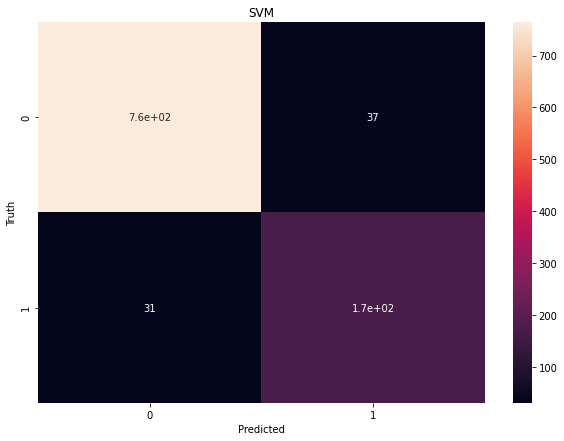

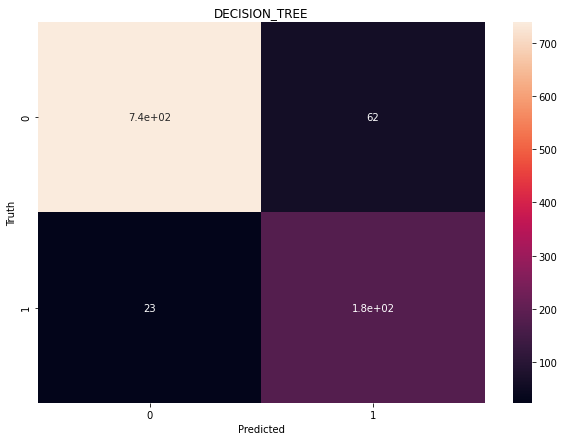

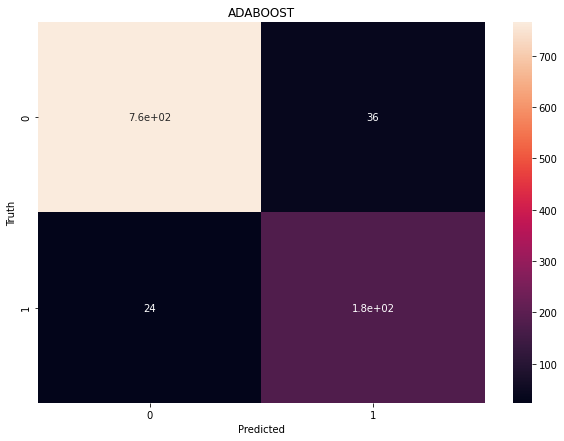

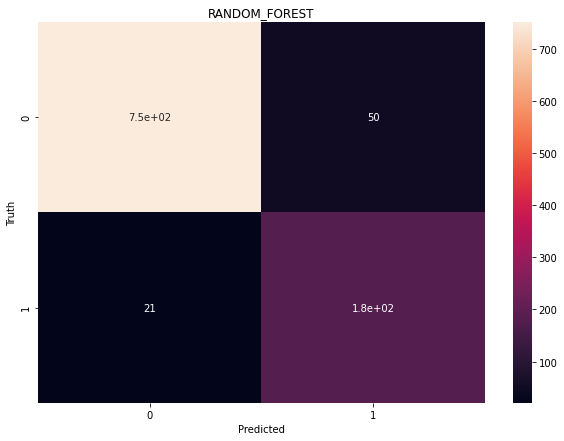

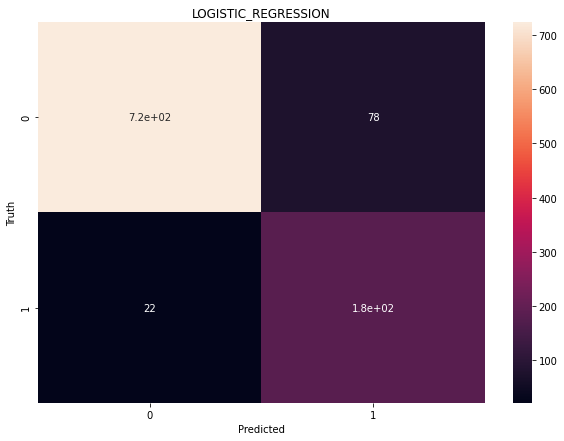

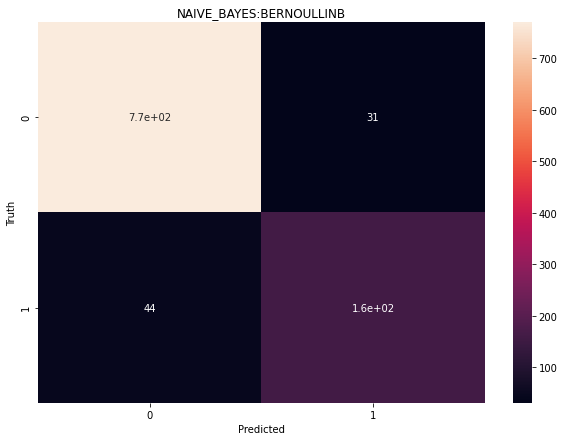

In [18]:
import seaborn as sn
%matplotlib inline
import matplotlib.pyplot as plt

#Confusion matrix of best classification results of the models
for model_name,matrix in ConfusionMatrix.items():
    #print(model_name)
    plt.figure(figsize = (10,7))
    sn.heatmap(matrix, annot=True)
    plt.title(model_name.upper())
    plt.xlabel('Predicted')
    plt.ylabel('Truth')


# TPOT for Automated Machine Learning

##### Reference


*   https://machinelearningmastery.com/tpot-for-automated-machine-learning-in-python/



In [20]:
pip install tpot

     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 166.7MB 90kB/s 
     |████████████████████████████████| 163kB 51.3MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=1c9bbb3015590df5a5a63128b258c4d669987e89b3537dc32bb245239fdb7b7a
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [19]:
import tpot
print('tpot: %s' % tpot.__version__)

ModuleNotFoundError: ignored

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from tpot import TPOTClassifier
# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
# define search
model = TPOTClassifier(generations=5, population_size=50, cv=cv, scoring='accuracy', verbosity=2, random_state=1, n_jobs=-1)

In [ ]:
# perform the search
model.fit(X, Y)
# export the best model
model.export('tpot_sonar_best_model.py')


Generation 1 - Current best internal CV score: 0.9352541254125413

Generation 2 - Current best internal CV score: 0.9379141914191421

Generation 3 - Current best internal CV score: 0.9385841584158416

Generation 4 - Current best internal CV score: 0.941894389438944

Generation 5 - Current best internal CV score: 0.941894389438944

Best pipeline: GaussianNB(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False))
